<a href="https://colab.research.google.com/github/chohj118/kagglestudy/blob/main/classification_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


패션 MNIST 데이터셋 불러오기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

데이터 전처리

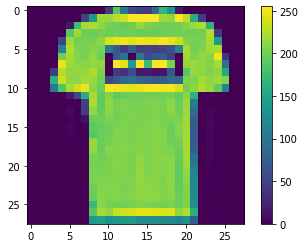

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

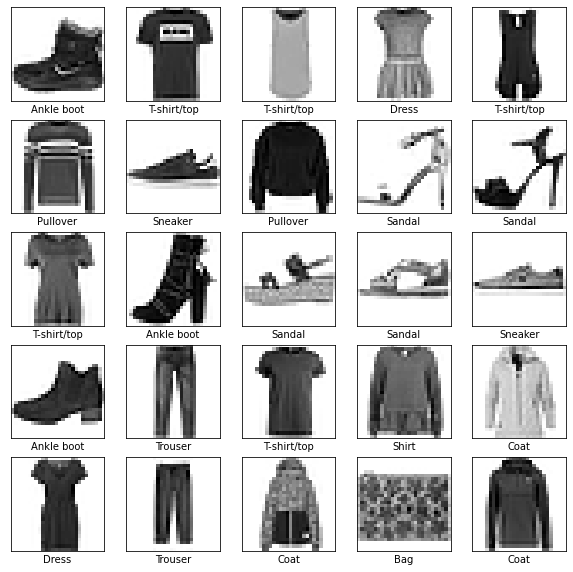

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

모델 피드

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4960 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3365 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2658 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2578 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2465 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

정확도 평가

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3509 - accuracy: 0.8777 - 1s/epoch - 3ms/step

Test accuracy: 0.8776999711990356


예측하기

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)
predictions

313/313 [==============================] - 1s 3ms/step


array([[4.9907243e-09, 3.6205079e-09, 3.4199438e-10, ..., 1.4035679e-02,
        1.6886904e-09, 9.8495442e-01],
       [5.6469155e-05, 4.3816527e-15, 9.9957043e-01, ..., 4.2015198e-13,
        1.2925902e-12, 5.1673265e-13],
       [2.3284683e-08, 9.9999994e-01, 4.9220107e-12, ..., 6.3552033e-22,
        3.5552945e-12, 1.3918529e-13],
       ...,
       [1.7204597e-06, 1.8124676e-09, 4.5438401e-06, ..., 2.7976050e-09,
        9.9990815e-01, 1.7466322e-11],
       [1.1059349e-07, 9.9997133e-01, 1.7306100e-10, ..., 4.8036310e-15,
        9.1558308e-09, 1.4231823e-08],
       [7.3401992e-07, 1.6182887e-10, 3.6442646e-07, ..., 2.0597450e-04,
        3.0206293e-06, 1.5805516e-07]], dtype=float32)

In [20]:
predictions[0]

array([4.9907243e-09, 3.6205079e-09, 3.4199438e-10, 2.9061451e-11,
       1.4774582e-08, 1.0098910e-03, 5.6091167e-08, 1.4035679e-02,
       1.6886904e-09, 9.8495442e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

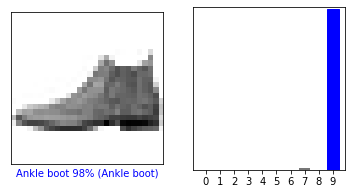

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

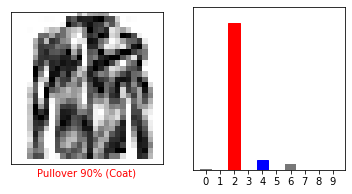

In [29]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

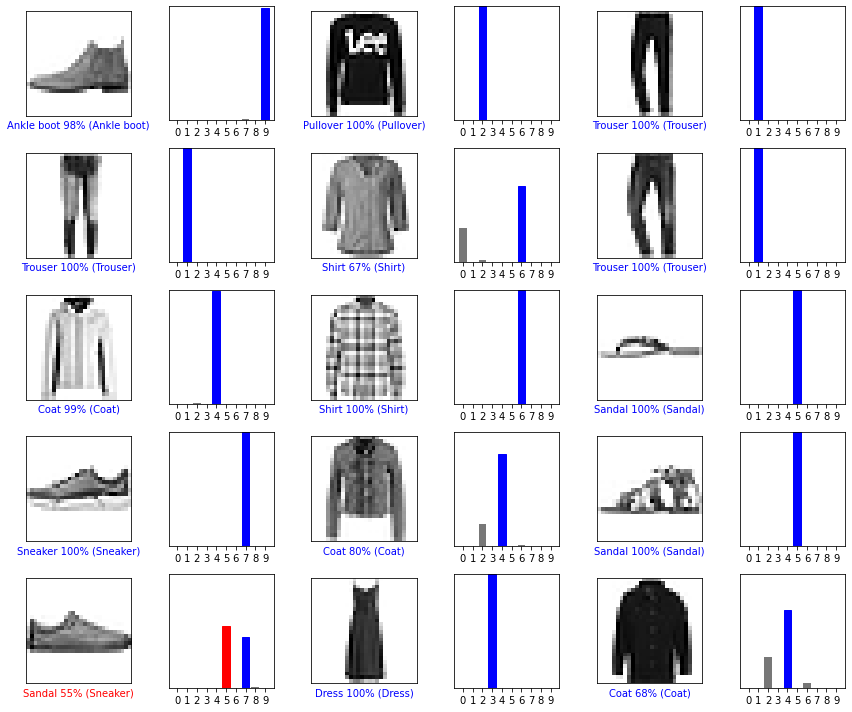

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

훈련된 모델 사용하기

In [31]:
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[5.6469100e-05 4.3816193e-15 9.9957043e-01 3.9623730e-13 3.0510753e-04
  8.6989338e-10 6.8047280e-05 4.2014957e-13 1.2925828e-12 5.1672875e-13]]


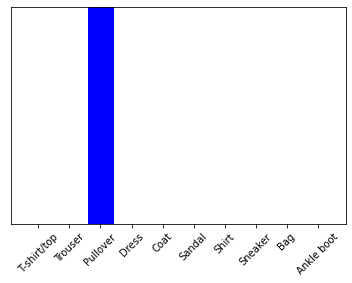

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [35]:
np.argmax(predictions_single[0])

2